# Building a Simple NLP Spam Dectector

## 1.0 Loading our Data

In [1]:
import numpy as np
import pandas as pd

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/spam.csv"
data = pd.read_csv(file_name, encoding = "latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
# Let's rename our columns to something a bit more interpretable and extract only the columns we need
data = data[['v1', 'v2']]
data = data.rename(columns = {'v1': 'label', 'v2': 'text'})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.shape

(5572, 2)

In [4]:
data.label.unique()

array(['ham', 'spam'], dtype=object)

In [5]:
# percentage of missing values in each column
round(100 * (data.isnull().sum()/len(data)),2).sort_values(ascending=False)

label    0.0
text     0.0
dtype: float64

In [9]:
# check duplicates
data[data[['label', 'text']].duplicated() == True]

,label,text


In [7]:
data = data.drop_duplicates()

In [10]:
# Sanity Check to make sure it worked
data[data[['label', 'text']].duplicated() == True]

,label,text


In [11]:
data.shape

(5169, 2)

#### Simple plot of out class label counts

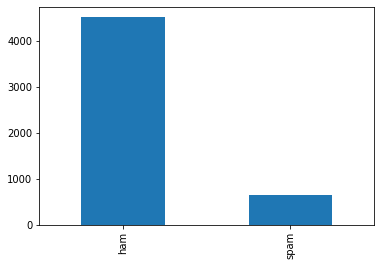

In [12]:
data.label.value_counts().plot(kind="bar")

# 2. Building our Spam/Ham Classifer

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def review_messages(msg):
    # converting messages to lowercase
    msg = msg.lower()
    return msg

In [14]:
# Processing text messages
data['text'] = data['text'].apply(review_messages)

In [15]:
# Inspect the changes on our data
data

,label,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


### Preparing our data

In [16]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size = 0.1, random_state = 1)

In [17]:
# training vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

![](https://miro.medium.com/max/3604/0*56JnM18OAx1lhIQb.png)

### Training our model

In [18]:
# training the classifier 
svm = svm.SVC(C=1000)
svm.fit(X_train_vec, y_train)

SVC(C=1000)

In [19]:
# testing against testing set 
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test) 

print("We have an accuracy of: " + str(accuracy_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

We have an accuracy of: 0.9845261121856866
[[462   0]
 [  8  47]]


### Predict where your text is Spam or Ham

In [20]:
# test against new messages 
def pred(msg):
    msg = vectorizer.transform([msg])
    prediction = svm.predict(msg)
    return prediction[0]

In [24]:
for i in range(0, 10):
  rand_index = np.random.randint(0, len(data))
  test_sample = data.iloc[rand_index][1]

  print(test_sample)
  print("Text is - " + str(pred(test_sample)) +"\n")

my sort code is  and acc no is . the bank is natwest. can you reply to confirm i've sent this to the right person!
Text is - ham

i am in a marriage function
Text is - ham

urgent! please call 09061213237 from a landline. å£5000 cash or a 4* holiday await collection. t &cs sae po box 177 m227xy. 16+
Text is - spam

glad it went well :) come over at 11 then we'll have plenty of time before claire goes to work.
Text is - ham

you please give us connection today itself before  &lt;decimal&gt;  or refund the bill
Text is - ham

k..k.:)congratulation ..
Text is - ham

i dont know what to do to come out of this so only am ask questions like this dont mistake me.
Text is - ham

can a not?
Text is - ham

hey.. something came up last min.. think i wun be signing up tmr.. hee
Text is - ham

thought we could go out for dinner. i'll treat you! seem ok?
Text is - ham

